# <center>**Importing Libraries for Data Analysis**</center>

In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [7]:
data = pd.read_csv('../data/raw/traffic_data.csv')

In [8]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


# <center>**Dataset Description** </center>

- Holiday: Indicates if the date is a holiday and if it specifies the holiday, if not None.
- Temp: Indicates the temperature in Kelvin.
- rain_1h: Amount in mm of rain that occurred in the hour.
- snow_1h: Amount in mm of snow that occurred in the hour.
- clouds_all: Percentage of cloud cover.
- weather_main: Short textual description of the current weather.
- weather_description: Longer textual description of the current weather.
- date_time: Hour of the data collected in local CST time.
- traffic_volume: Hourly I-94 ATR 301 reported westbound traffic volume.

In [9]:
data.shape

(48204, 9)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [11]:
data.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [12]:
data.describe(include='object')

,holiday,weather_main,weather_description,date_time
count,48204,48204,48204,48204
unique,12,11,38,40575
top,None,Clouds,sky is clear,2013-05-19 10:00:00
freq,48143,15164,11665,6


# <center>**EDA**</center>

In [13]:
for i in data.columns:
    print(f"{'-'*30} {i} {'-'*30}")
    print(f"Data Type - {data[i].dtype}")
    print(f"Null count - {data[i].isnull().sum()}")
    print(f"Unique Values - {data[i].value_counts()}")
    
    

------------------------------ holiday ------------------------------
Data Type - object
Null count - 0
Unique Values - None                         48143
Labor Day                        7
Thanksgiving Day                 6
Christmas Day                    6
New Years Day                    6
Martin Luther King Jr Day        6
Columbus Day                     5
Veterans Day                     5
Washingtons Birthday             5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Name: holiday, dtype: int64
------------------------------ temp ------------------------------
Data Type - float64
Null count - 0
Unique Values - 274.150    128
275.150     89
274.080     85
276.793     78
291.150     73
          ... 
260.970      1
277.240      1
270.190      1
282.190      1
304.900      1
Name: temp, Length: 5843, dtype: int64
------------------------------ rain_1h ------------------------------
Data Type - float64
Null count - 0
Uniqu

In [14]:
data['temp'][data['temp']==0].value_counts()

0.0    10
Name: temp, dtype: int64

#  <center>**About the data**</center>
- The data does not have any null values but it is full of inconsistant values.
- Holidays are specified, but majority of the column has None value, which indicates that those are non-holiday days.
- Temperature in some places is absolute zero, stating inconsistancy.
- weather_main gives enough information of the weather condition, so weather_description feature which gives a brief description of the data is not required.
- data_time feature is of object type, so it should be converted into a pd.DateTime format. Also extracting the hours from the datetime would be helpful to analyse at what time the traffic is heavy.
- rain_1h and snow_1h have a lot of 0 values but as they the feature defines the amount of rain and snow fell at that particular hour it is most likely to be zero as these conditions are seasonal. So we can ignore these values.

# Holiday

In [15]:
def countplot(feature):
    plt.figure(figsize = (16,6))
    sns.countplot(y=feature)
    plt.show()


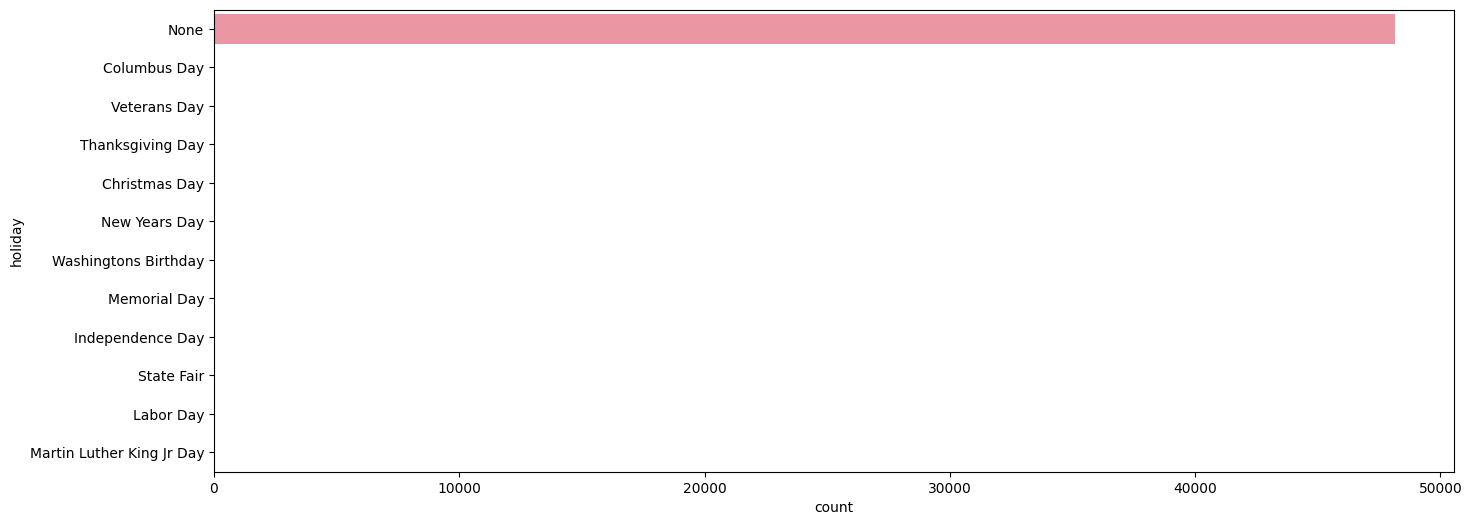

In [16]:
countplot(data['holiday'])

As holidays are very less in our data, any holiday is not visible.

In [17]:
holiday_data = data[data['holiday']!='None']

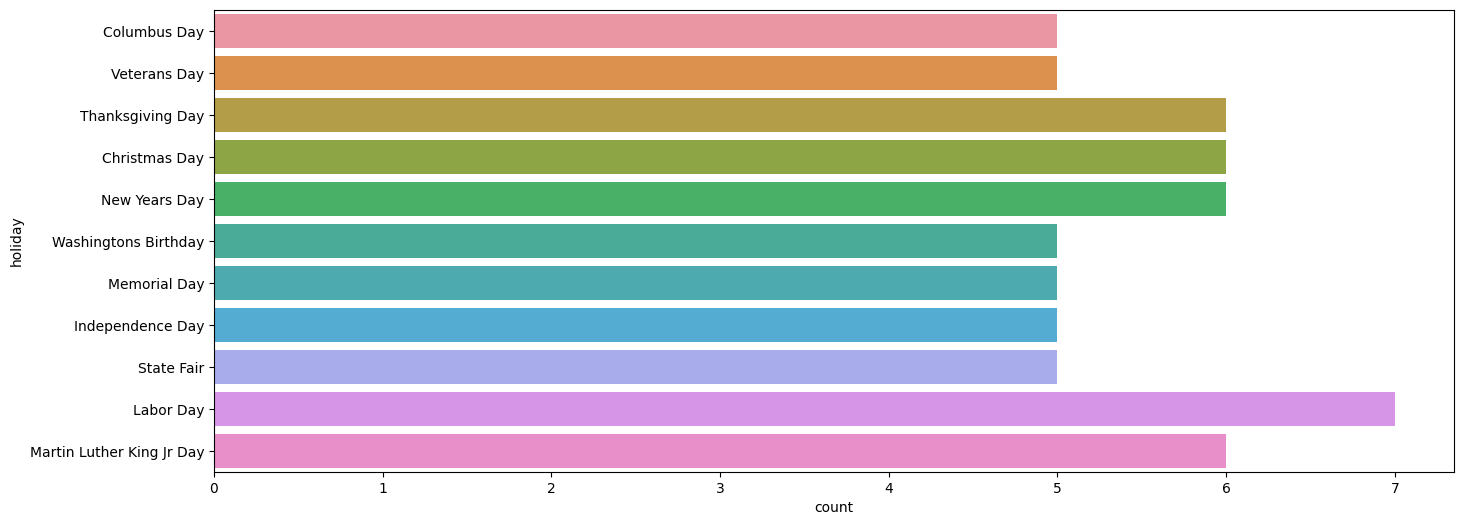

In [18]:
countplot(holiday_data['holiday'])

# Temperature

In [19]:
def boxplot(x_feature,y_feature):
    plt.figure(figsize = (16,6))
    sns.barplot(x=x_feature, y= y_feature)
    plt.show()

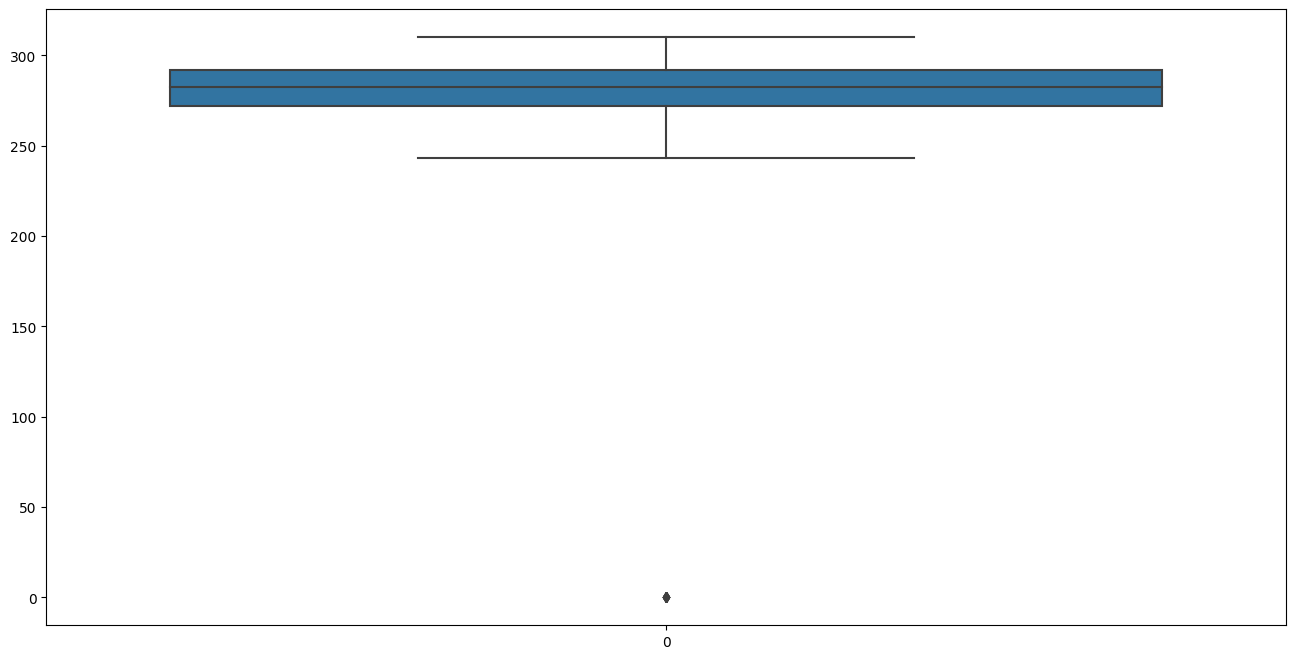

In [20]:
plt.figure(figsize = (16,8))
sns.boxplot(data['temp'])
plt.show()

In [21]:
data[data['temp']==0]['temp'].value_counts()

0.0    10
Name: temp, dtype: int64

There are outliers in our data, there are the 0 values discussed earlier which might not have been captured. There are only 10 zero values in our data so we can remove this data easily.

# Rain and Snow 

In [22]:
def distplot(feature, set_kde:bool):
    plt.figure(figsize = (16,6))
    sns.distplot(x=feature, kde = set_kde)
    plt.show()

In [23]:
data[data['rain_1h']==0.0]['rain_1h'].value_counts()

0.0    44737
Name: rain_1h, dtype: int64

c:\Data-Science-Projects\Metro-Interstate-Traffic-Analysis\venv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


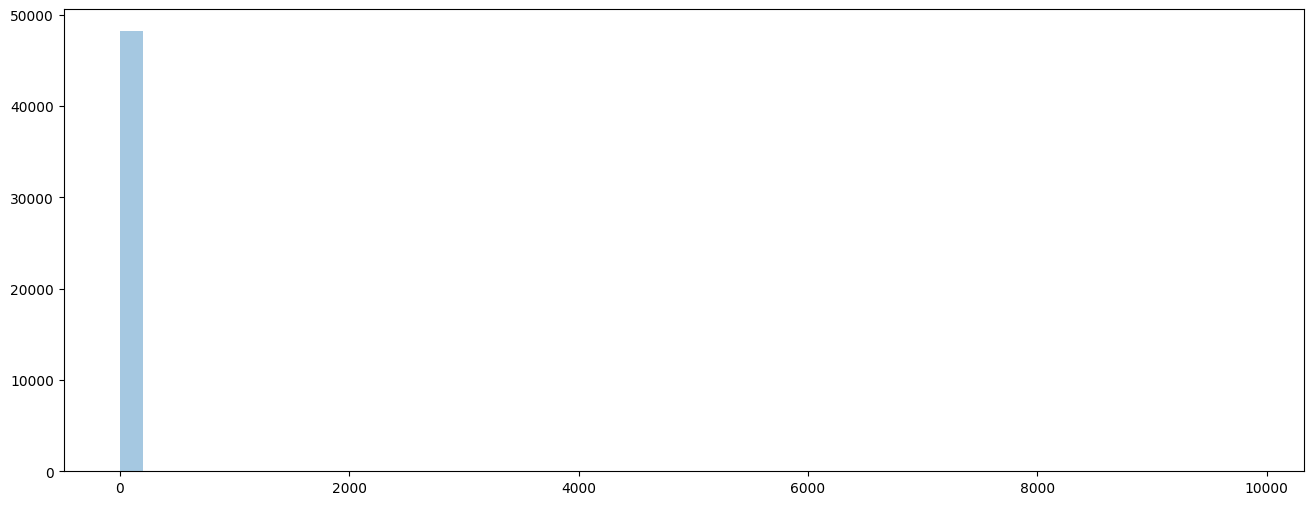

In [24]:
distplot(data['rain_1h'], False)

In [25]:
data[data['snow_1h']==0.0]['snow_1h'].value_counts()

0.0    48141
Name: snow_1h, dtype: int64

c:\Data-Science-Projects\Metro-Interstate-Traffic-Analysis\venv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


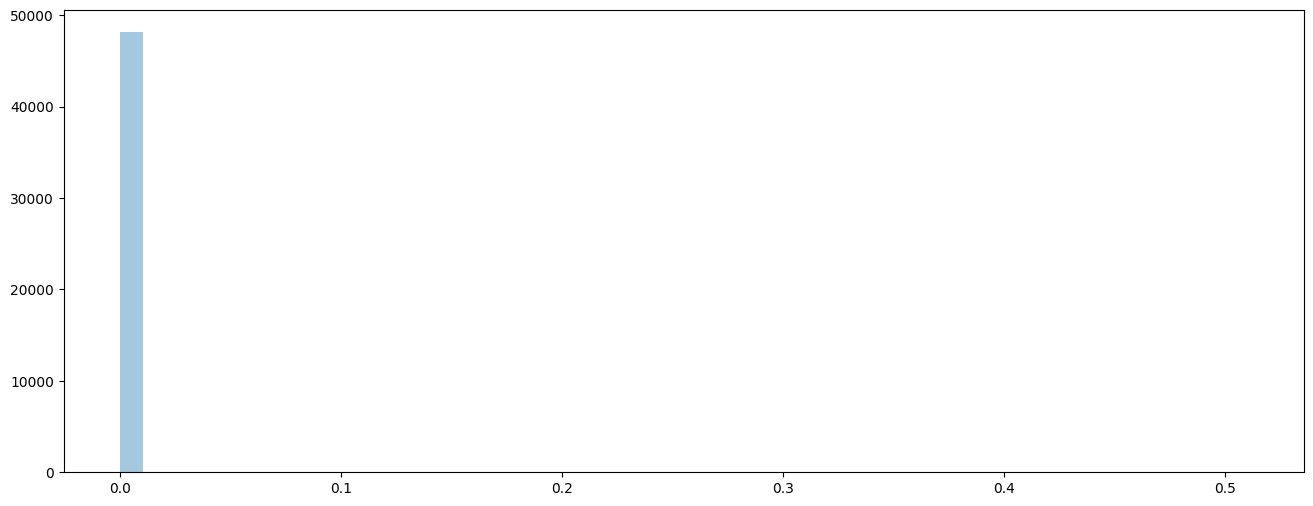

In [26]:
distplot(data['snow_1h'], False)

# Cloud Percentage

c:\Data-Science-Projects\Metro-Interstate-Traffic-Analysis\venv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


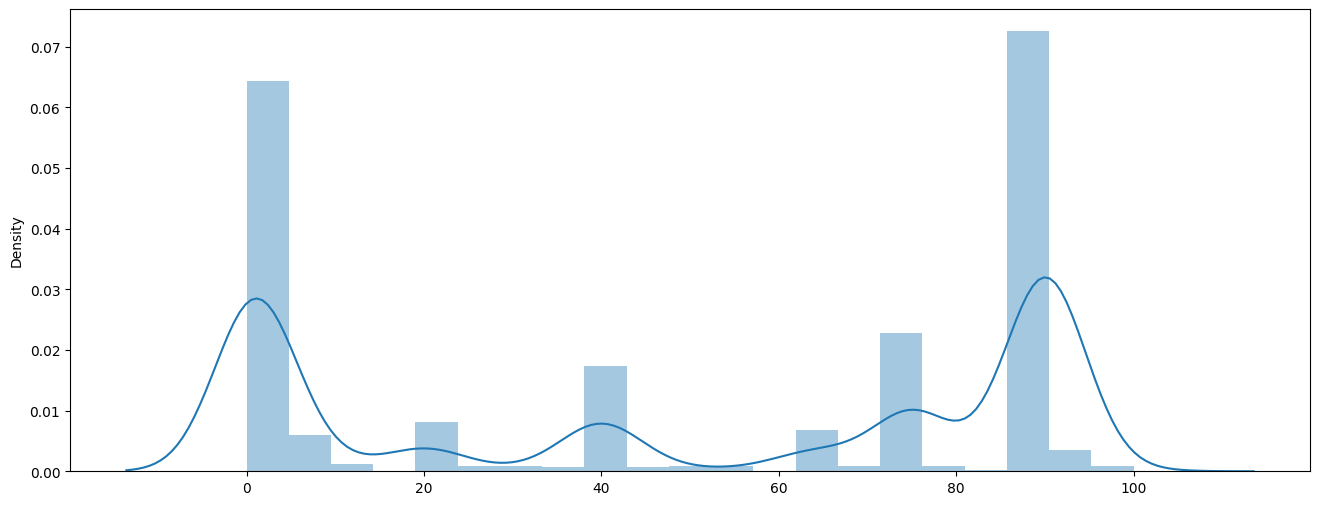

In [27]:
distplot(data['clouds_all'], set_kde=True)

In [28]:
data[data['clouds_all']==0.0]['clouds_all'].value_counts()

0    1988
Name: clouds_all, dtype: int64

Trere are some 0 values in this feature but these can be ignored as the result is physically possible and the feature is somewhat evenly distributed.

# Weather main and Weather Description

In [29]:
data['weather_main'].value_counts()

Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64

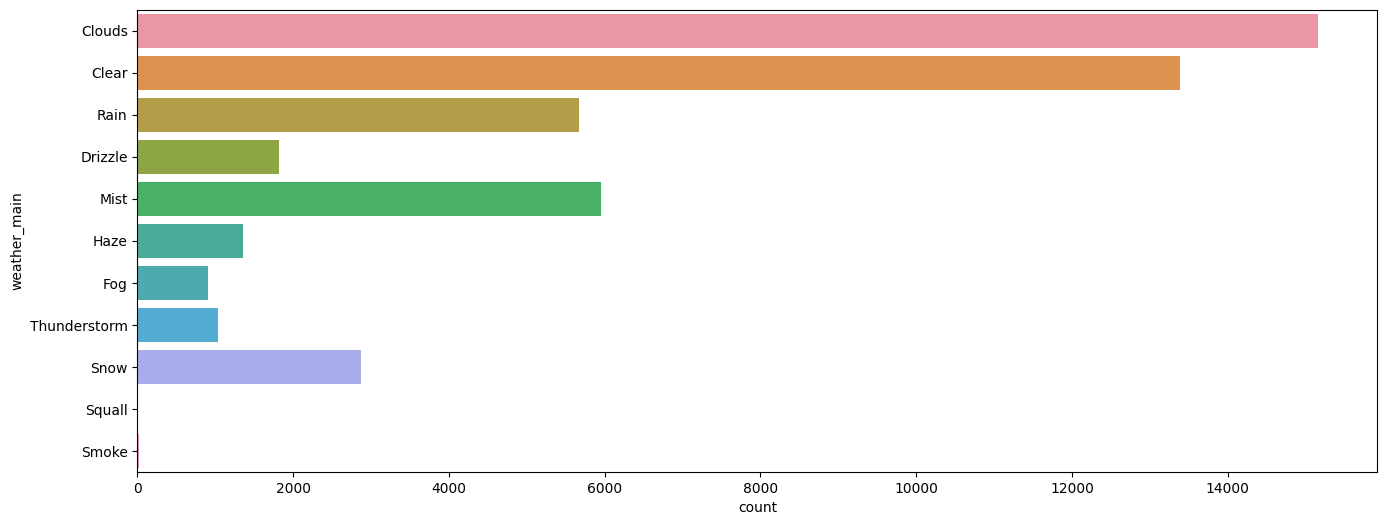

In [30]:
countplot(data['weather_main'])

In [31]:
data['weather_description'].value_counts()

sky is clear                           11665
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
Sky is Clear                            1726
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             125
heavy intensity drizzle                   64
thunderstorm with heavy rain              63
thundersto

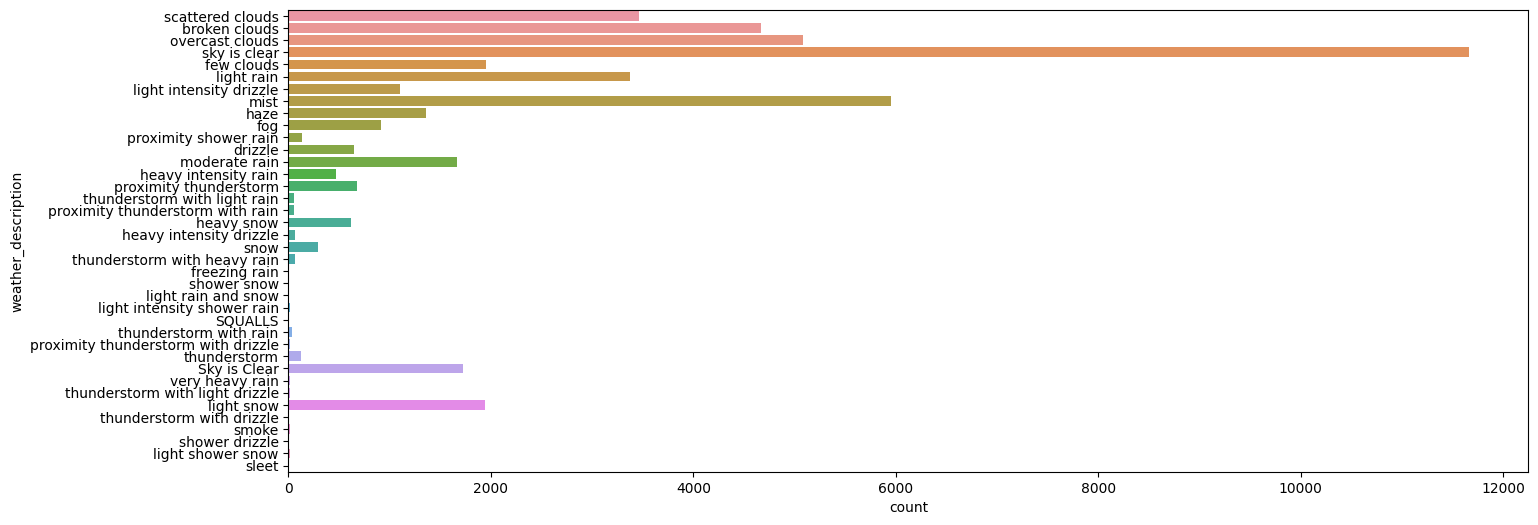

In [32]:
countplot(data['weather_description'])

Weather Description feature is a detailed description of the weather i.e. an expanded version of weather main.
As reqiured information will be achieved through weather main, weather description will not be required in our case. 

# <center>**Data Cleaning**</center>

- **Dropping snow_1h, rain_1h and weather_description** 

In [33]:
new_df = data.drop(['snow_1h', 'rain_1h', 'weather_description'], axis = 1)

In [34]:
new_df.head()

,holiday,temp,clouds_all,weather_main,date_time,traffic_volume
0,None,288.28,40,Clouds,2012-10-02 09:00:00,5545
1,None,289.36,75,Clouds,2012-10-02 10:00:00,4516
2,None,289.58,90,Clouds,2012-10-02 11:00:00,4767
3,None,290.13,90,Clouds,2012-10-02 12:00:00,5026
4,None,291.14,75,Clouds,2012-10-02 13:00:00,4918


In [35]:
new_df.shape

(48204, 6)

- **Dropping 0 values from temperature** 

In [36]:
new_df = new_df.drop(new_df[new_df['temp']==0].index, axis = 0)

In [37]:
new_df.head()

,holiday,temp,clouds_all,weather_main,date_time,traffic_volume
0,None,288.28,40,Clouds,2012-10-02 09:00:00,5545
1,None,289.36,75,Clouds,2012-10-02 10:00:00,4516
2,None,289.58,90,Clouds,2012-10-02 11:00:00,4767
3,None,290.13,90,Clouds,2012-10-02 12:00:00,5026
4,None,291.14,75,Clouds,2012-10-02 13:00:00,4918


In [38]:
new_df.shape

(48194, 6)

- **Parsing all holidays into a single unit 'holiday'.** 

In [39]:
def parse_holiday(holiday):
    val = 'None' 
    if holiday != 'None':
        val = 'holiday'

    return val

In [40]:
new_df['holiday'] = new_df['holiday'].map(parse_holiday)

In [41]:
new_df['holiday'].unique()

array(['None', 'holiday'], dtype=object)

- **Removing Duplicate Values** 

In [42]:
new_df.shape

(48194, 6)

In [43]:
new_df.duplicated().sum()

234

In [44]:
new_df.drop_duplicates(inplace=True)

In [45]:
new_df.shape

(47960, 6)

- **Parsing date_time feature to pd.DateTime.** 

In [46]:
new_df['date_time'] = pd.to_datetime(new_df['date_time'])

In [47]:
new_df['date_time'].head()

0   2012-10-02 09:00:00
1   2012-10-02 10:00:00
2   2012-10-02 11:00:00
3   2012-10-02 12:00:00
4   2012-10-02 13:00:00
Name: date_time, dtype: datetime64[ns]

In [48]:
new_df['date_time'].dtype

dtype('<M8[ns]')

- **Creating new columns from datetime column**

In [49]:
new_df['year'] = new_df['date_time'].dt.year
new_df['month'] = new_df['date_time'].dt.month
new_df['weekday'] = new_df['date_time'].dt.weekday
new_df['hour'] = new_df['date_time'].dt.hour

In [50]:
new_df.head()

,holiday,temp,clouds_all,weather_main,date_time,traffic_volume,year,month,weekday,hour
0,None,288.28,40,Clouds,2012-10-02 09:00:00,5545,2012,10,1,9
1,None,289.36,75,Clouds,2012-10-02 10:00:00,4516,2012,10,1,10
2,None,289.58,90,Clouds,2012-10-02 11:00:00,4767,2012,10,1,11
3,None,290.13,90,Clouds,2012-10-02 12:00:00,5026,2012,10,1,12
4,None,291.14,75,Clouds,2012-10-02 13:00:00,4918,2012,10,1,13


- **Creating a new column for categorizing hours into parts of a day.**

In [51]:
new_df['hour'].unique()

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,
        2,  3,  4,  5,  6,  8,  7], dtype=int64)

In [52]:
def categorize_hour(hour):
    cat = None
    if hour in [1,2,3,4,5]:
        cat = 'dawn'
    elif hour in [6,7,8,9,10,11,12]:
        cat = 'morning'
    elif hour in [13,14,15,16,17,18]:
        cat = 'afternoon'
    elif hour in [19,20,21,22,23,0]:
        cat = 'night'

    return cat


In [53]:
new_df['day_part'] = new_df['hour'].map(categorize_hour)

In [54]:
new_df.head()

,holiday,temp,clouds_all,weather_main,date_time,traffic_volume,year,month,weekday,hour,day_part
0,None,288.28,40,Clouds,2012-10-02 09:00:00,5545,2012,10,1,9,morning
1,None,289.36,75,Clouds,2012-10-02 10:00:00,4516,2012,10,1,10,morning
2,None,289.58,90,Clouds,2012-10-02 11:00:00,4767,2012,10,1,11,morning
3,None,290.13,90,Clouds,2012-10-02 12:00:00,5026,2012,10,1,12,morning
4,None,291.14,75,Clouds,2012-10-02 13:00:00,4918,2012,10,1,13,afternoon


- **Setting datetime column as index**

In [55]:
new_df.set_index('date_time',inplace=True)

In [56]:
new_df.head()

,holiday,temp,clouds_all,weather_main,traffic_volume,year,month,weekday,hour,day_part
date_time,,,,,,,,,,
2012-10-02 09:00:00,None,288.28,40,Clouds,5545,2012,10,1,9,morning
2012-10-02 10:00:00,None,289.36,75,Clouds,4516,2012,10,1,10,morning
2012-10-02 11:00:00,None,289.58,90,Clouds,4767,2012,10,1,11,morning
2012-10-02 12:00:00,None,290.13,90,Clouds,5026,2012,10,1,12,morning
2012-10-02 13:00:00,None,291.14,75,Clouds,4918,2012,10,1,13,afternoon


# <center>**Data Analysis through Visualisation**</center>

# Independent features against dependent feature.

1. **Rolling mean for Date Time against Traffic_Volume**

- A rolling mean is simply the mean of a certain number of previous periods in a time series.

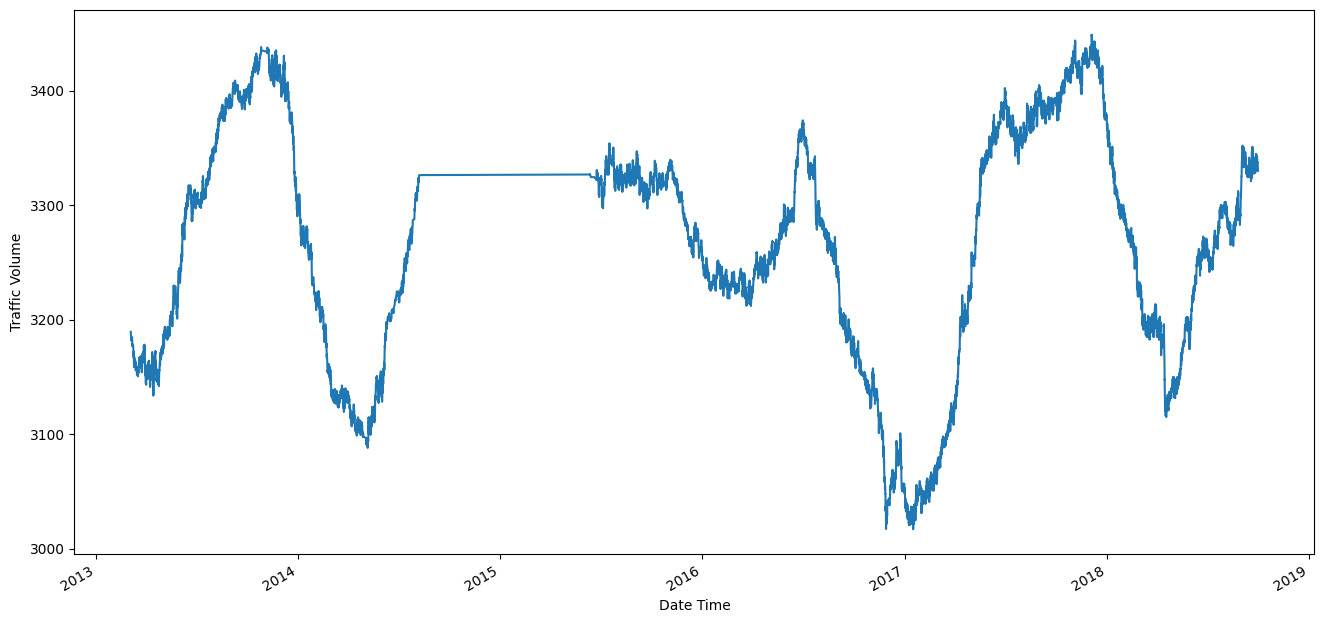

In [57]:
new_df.sort_index()['traffic_volume'].rolling(4000).mean().plot(figsize=(16,8))
plt.xlabel('Date Time')
plt.ylabel('Traffic Volume')
plt.show()

2. **Holiday against Traffic_Volume**

In [58]:
def scatter_compareplot(x_feature, y_feature, xlabel, ylabel):
    plt.figure(figsize = (16,6))
    sns.scatterplot(x= x_feature,y=y_feature)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

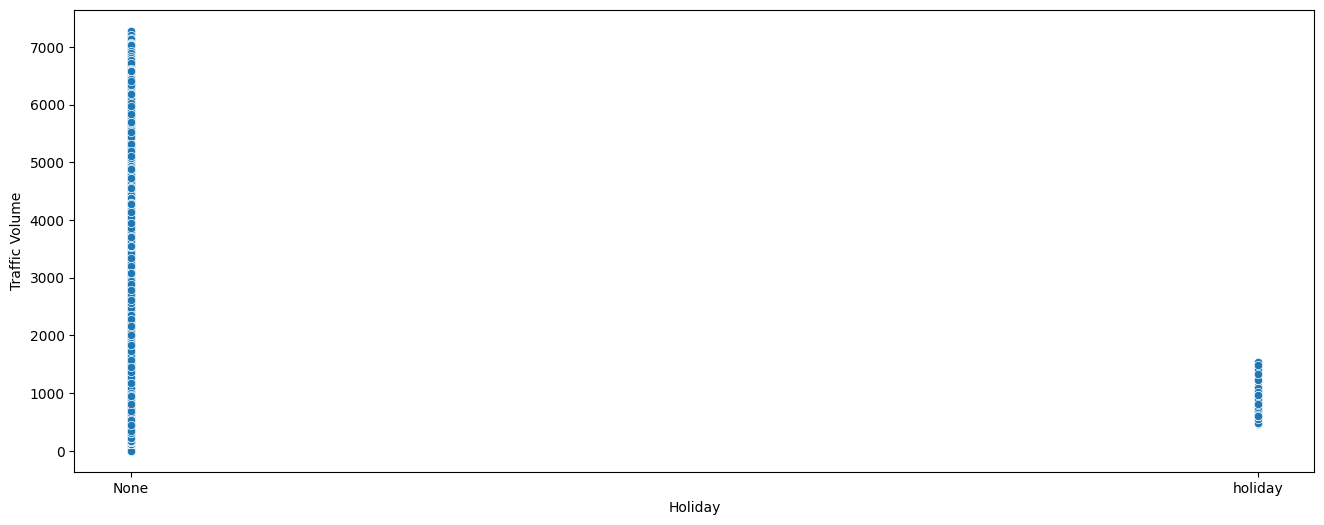

In [59]:
scatter_compareplot(new_df['holiday'], new_df['traffic_volume'], 'Holiday', 'Traffic Volume')

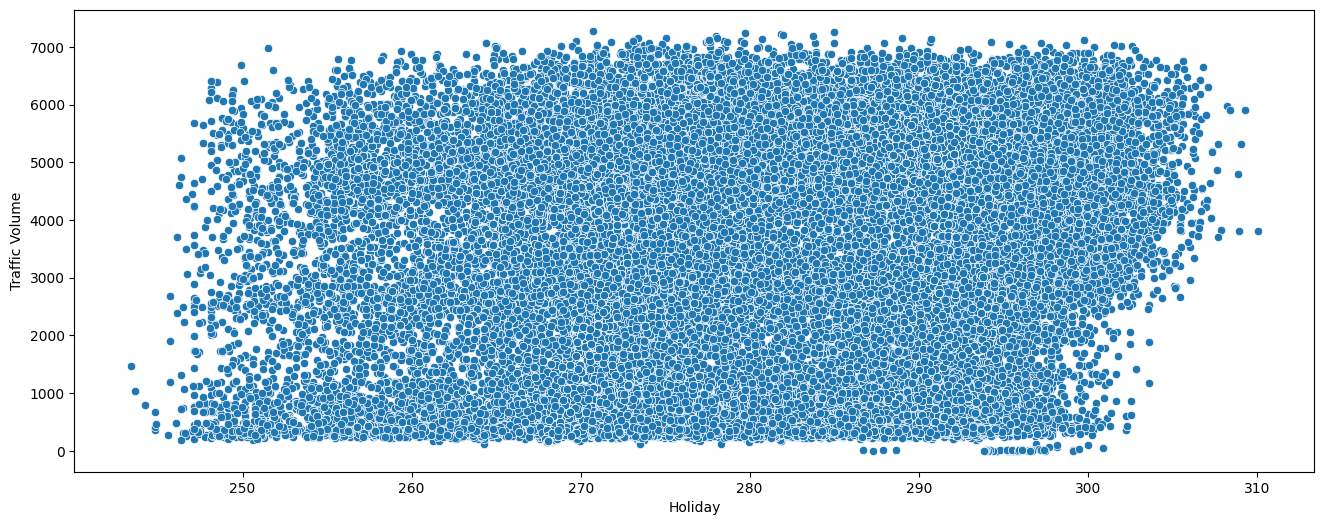

In [60]:
scatter_compareplot(new_df['temp'], new_df['traffic_volume'], 'Holiday', 'Traffic Volume')

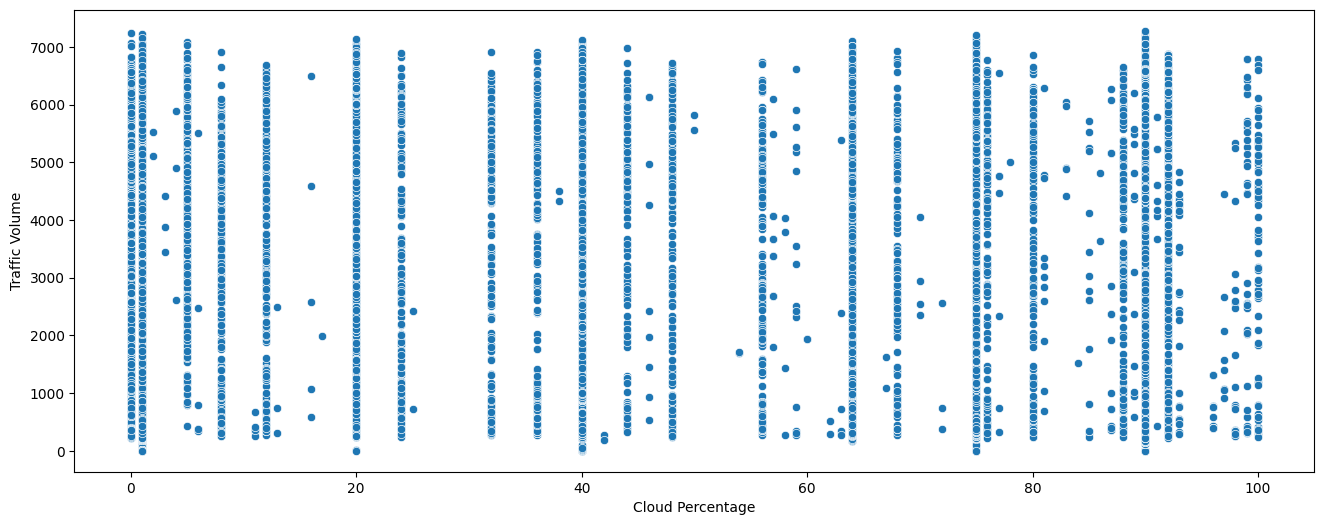

In [61]:
scatter_compareplot(new_df['clouds_all'], new_df['traffic_volume'], 'Cloud Percentage', 'Traffic Volume')

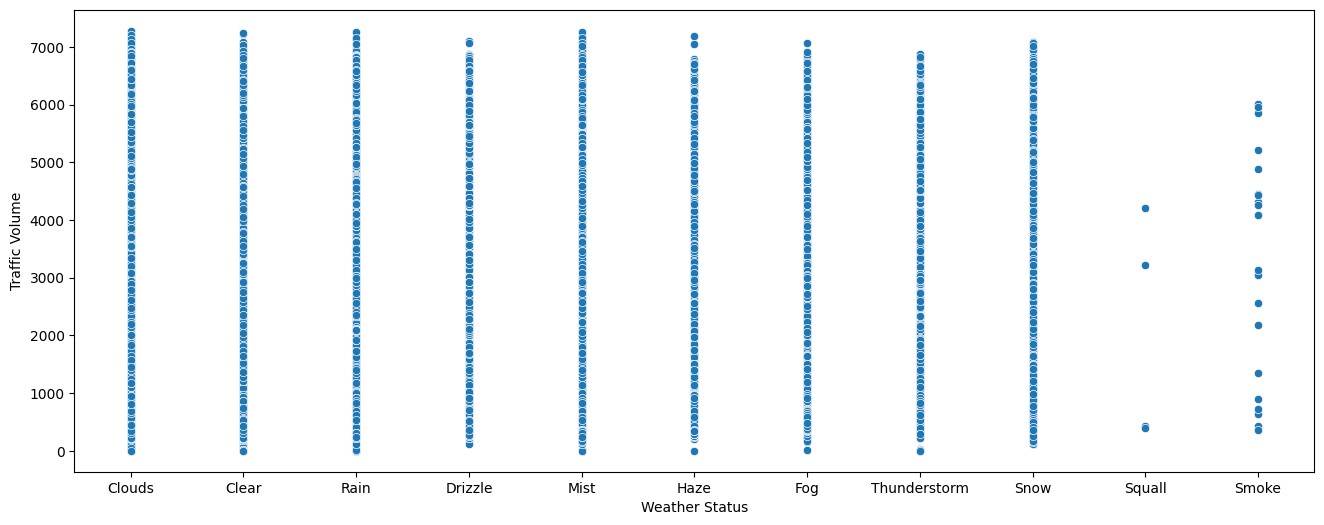

In [62]:
scatter_compareplot(new_df['weather_main'], new_df['traffic_volume'], 'Weather Status', 'Traffic Volume')

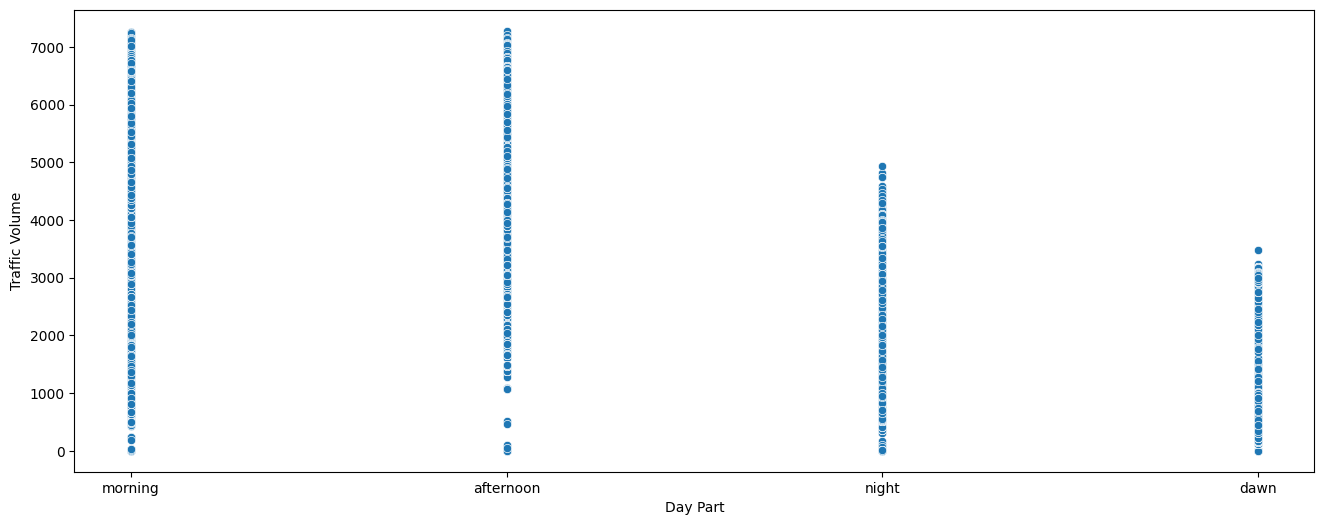

In [63]:
scatter_compareplot(new_df['day_part'], new_df['traffic_volume'], 'Day Part', 'Traffic Volume')

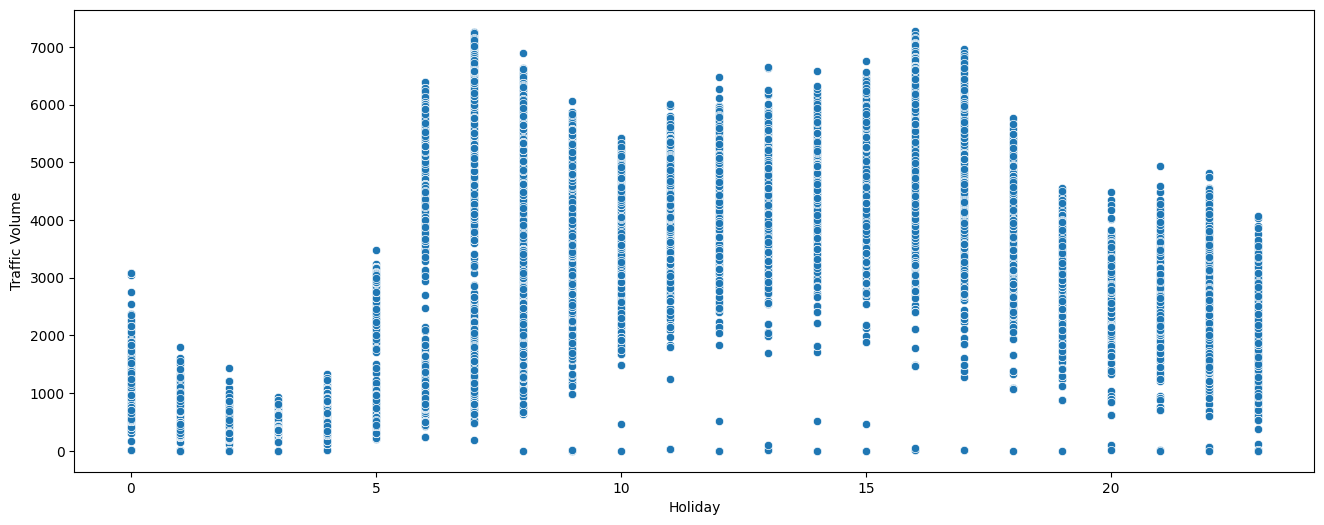

In [64]:
scatter_compareplot(new_df['hour'], new_df['traffic_volume'], 'Holiday', 'Traffic Volume')

# <center>**Feature Importance**</center>

In order to find the most important features in our data, we will find the feature importance by running a Random Forest Algorithm over the data.
But, first we have to convert categorical data into numeric as object datatype won't work.

 ### 1.  Splitting Features and Target feature

In [65]:
ind_feats =  new_df.drop('traffic_volume', axis=1).copy()

In [66]:
ind_feats.head()

,holiday,temp,clouds_all,weather_main,year,month,weekday,hour,day_part
date_time,,,,,,,,,
2012-10-02 09:00:00,None,288.28,40,Clouds,2012,10,1,9,morning
2012-10-02 10:00:00,None,289.36,75,Clouds,2012,10,1,10,morning
2012-10-02 11:00:00,None,289.58,90,Clouds,2012,10,1,11,morning
2012-10-02 12:00:00,None,290.13,90,Clouds,2012,10,1,12,morning
2012-10-02 13:00:00,None,291.14,75,Clouds,2012,10,1,13,afternoon


In [67]:
trg_feat = new_df['traffic_volume'].copy()

In [68]:
trg_feat

date_time
2012-10-02 09:00:00    5545
2012-10-02 10:00:00    4516
2012-10-02 11:00:00    4767
2012-10-02 12:00:00    5026
2012-10-02 13:00:00    4918
                       ... 
2018-09-30 19:00:00    3543
2018-09-30 20:00:00    2781
2018-09-30 21:00:00    2159
2018-09-30 22:00:00    1450
2018-09-30 23:00:00     954
Name: traffic_volume, Length: 47960, dtype: int64

 ### 2.  Label Encoding

In [73]:
from sklearn.preprocessing import LabelEncoder

In [74]:
le = LabelEncoder()

In [75]:
num_feats = ind_feats.copy()
for column in num_feats.columns:
    if num_feats[column].dtypes == 'object':
        num_feats[column] = le.fit_transform(num_feats[column])

In [76]:
num_feats.head()

,holiday,temp,clouds_all,weather_main,year,month,weekday,hour,day_part
date_time,,,,,,,,,
2012-10-02 09:00:00,0,288.28,40,1,2012,10,1,9,2
2012-10-02 10:00:00,0,289.36,75,1,2012,10,1,10,2
2012-10-02 11:00:00,0,289.58,90,1,2012,10,1,11,2
2012-10-02 12:00:00,0,290.13,90,1,2012,10,1,12,2
2012-10-02 13:00:00,0,291.14,75,1,2012,10,1,13,0


In [77]:
num_feats['holiday'].value_counts()

0    47899
1       61
Name: holiday, dtype: int64

In [78]:
num_feats['weather_main'].value_counts()

1     15156
0     13374
5      5949
6      5576
8      2803
2      1795
4      1360
10     1011
3       912
7        20
9         4
Name: weather_main, dtype: int64

### 3. One Hot Encoding

In [79]:
onehot_feats = ind_feats.copy()
onehot_feats[['year','month','weekday']] = onehot_feats[['year','month','weekday']].astype('category') 
onehot_feats = pd.get_dummies(onehot_feats)
onehot_feats.head()

,temp,clouds_all,hour,holiday_None,holiday_holiday,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,day_part_afternoon,day_part_dawn,day_part_morning,day_part_night
date_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,288.28,40,9,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2012-10-02 10:00:00,289.36,75,10,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2012-10-02 11:00:00,289.58,90,11,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2012-10-02 12:00:00,290.13,90,12,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2012-10-02 13:00:00,291.14,75,13,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0


### 4. Feature Importance - Label Encoded Features

- Using Random Forest Regressor for finding out feature importance.

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
rfr = RandomForestRegressor(random_state=42, max_depth=10)

In [82]:
rfr.fit(num_feats, trg_feat)

RandomForestRegressor(max_depth=10, random_state=42)

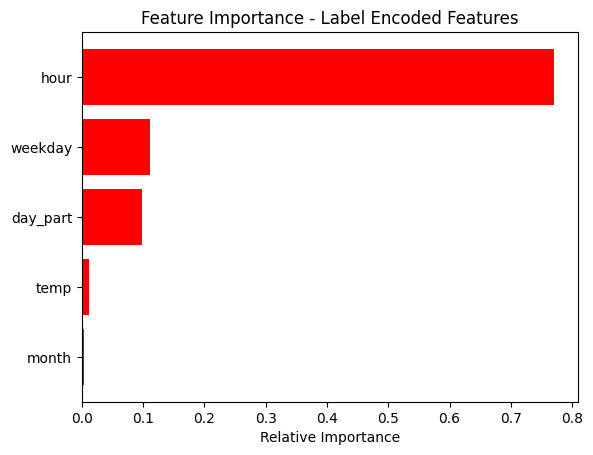

In [83]:
features = ind_feats.columns
importance = rfr.feature_importances_
indices = np.argsort(importance)[-5:] # Top 5 features
plt.title('Feature Importance - Label Encoded Features')
plt.barh(range(len(indices)), importance[indices], color= 'red', align = 'center')
plt.yticks(range(len(indices)), [features[feature] for feature in indices])
plt.xlabel('Relative Importance')
plt.show()

### 4. Feature Importance - OneHot Encoded Features

In [84]:
rfr1 = RandomForestRegressor(random_state=42, max_depth=10)
rfr1.fit(onehot_feats, trg_feat)

RandomForestRegressor(max_depth=10, random_state=42)

In [85]:
oh_features = onehot_feats.columns
oh_importance = rfr1.feature_importances_
oh_indices = np.argsort(oh_importance)[-10:] # Top 10 features

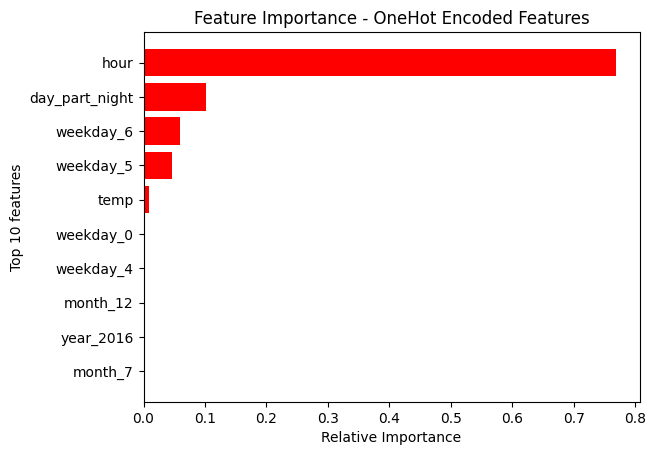

In [86]:
plt.title('Feature Importance - OneHot Encoded Features')
plt.barh(range(len(oh_indices)), oh_importance[oh_indices], color = 'red', align='center')
plt.yticks(range(len(oh_indices)), [oh_features[feature] for feature in oh_indices])
plt.xlabel('Relative Importance')
plt.ylabel('Top 10 features')
plt.show()

1. As per our analysis on feature importance, hour feature proves to be the most important feature. 
2. day_part feature which categorizes the hours into parts of the day totally depending upon the hour feature also can be used for detailed analysis of behaviour of Traffic Volume on diffrent times of the day.
3. Through feature importance of one hot encoded values we can clearly see that the traffic volume is very high when it comes to weekends.

# <center>**Saving the cleaned data.**</center>

In [87]:
new_df

,holiday,temp,clouds_all,weather_main,traffic_volume,year,month,weekday,hour,day_part
date_time,,,,,,,,,,
2012-10-02 09:00:00,None,288.28,40,Clouds,5545,2012,10,1,9,morning
2012-10-02 10:00:00,None,289.36,75,Clouds,4516,2012,10,1,10,morning
2012-10-02 11:00:00,None,289.58,90,Clouds,4767,2012,10,1,11,morning
2012-10-02 12:00:00,None,290.13,90,Clouds,5026,2012,10,1,12,morning
2012-10-02 13:00:00,None,291.14,75,Clouds,4918,2012,10,1,13,afternoon
...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,None,283.45,75,Clouds,3543,2018,9,6,19,night
2018-09-30 20:00:00,None,282.76,90,Clouds,2781,2018,9,6,20,night
2018-09-30 21:00:00,None,282.73,90,Thunderstorm,2159,2018,9,6,21,night


In [107]:
new_df.to_csv('CLEANED_METRO_INTERSTATE_TRAFFIC.csv')

In [108]:
dd = pd.read_csv('CLEANED_METRO_INTERSTATE_TRAFFIC.csv', index_col='date_time')

In [109]:
dd.head()

,date_time,holiday,temp,clouds_all,weather_main,traffic_volume,year,month,weekday,hour,day_part
0,2012-10-02 09:00:00,None,288.28,40,Clouds,5545,2012,10,1,9,morning
1,2012-10-02 10:00:00,None,289.36,75,Clouds,4516,2012,10,1,10,morning
2,2012-10-02 11:00:00,None,289.58,90,Clouds,4767,2012,10,1,11,morning
3,2012-10-02 12:00:00,None,290.13,90,Clouds,5026,2012,10,1,12,morning
4,2012-10-02 13:00:00,None,291.14,75,Clouds,4918,2012,10,1,13,afternoon
